In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

# load the dataset
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [21]:
# Convert the month and day column to numerical values
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7
}

df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)

# Drop the 'X' and 'Y' columns due to their high correlation with 'area'
df.drop(columns=['X', 'Y', 'month', 'day'], inplace=True)

# Perform log transformation on the 'area' column due to its skewed distribution
df['area'] = np.log1p(df['area'])

# Display the updated dataset
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Obj. Func: Lower Bound: -22.536671496151918 Iteration: 18
Obj. Func: Lower Bound: -21.992564897821484 Iteration: 14
Obj. Func: Lower Bound: -20.19215341591121 Iteration: 20
Obj. Func: Lower Bound: -19.94192134341058 Iteration: 20
Obj. Func: Lower Bound: -20.220771872722224 Iteration: 12
Obj. Func: Lower Bound: -19.13670587007892 Iteration: 15
Obj. Func: Lower Bound: -19.27659088104398 Iteration: 23
Obj. Func: Lower Bound: -18.251916267608216 Iteration: 21
Obj. Func: Lower Bound: -18.096671097354736 Iteration: 12


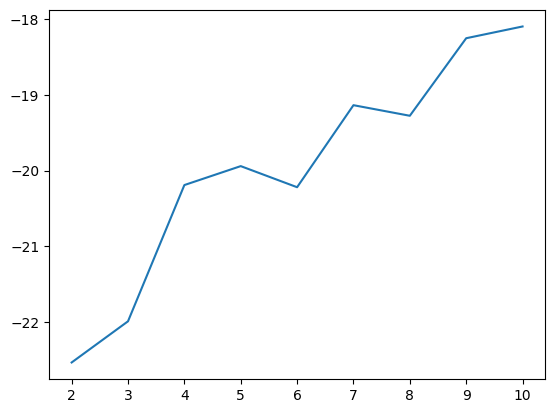

In [22]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    gmm = GaussianMixture(n_components = i, random_state=0).fit(df) 
    print("Obj. Func:", "Lower Bound:", gmm.lower_bound_, "Iteration:", gmm.n_iter_)
    objFuncs.append(gmm.lower_bound_)

plt.plot(clusterRange, objFuncs)

# Try with different Scaling methods

In [23]:
scalers = {
    'Standard Scaler': StandardScaler(),
    'Min Max Scaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

randomStates, kmeans = [0, 10, 100, 1000], {}

StandardScaler()
GaussianMixture(n_components=3, random_state=0)
(array([0, 1, 2]), array([426,   9,  82]))


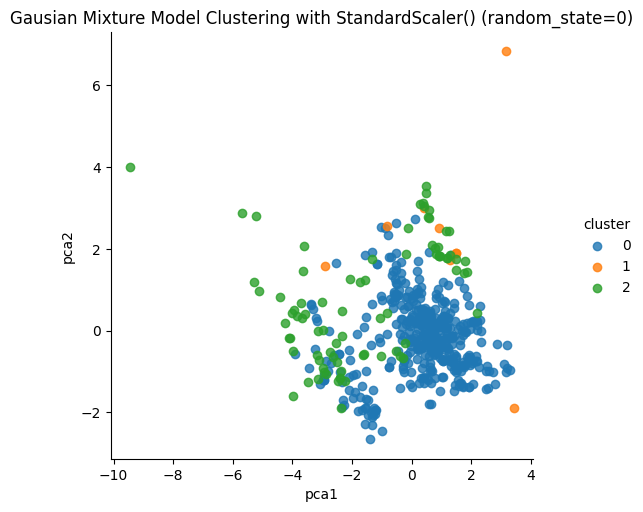

GaussianMixture(n_components=3, random_state=10)
(array([0, 1, 2]), array([  9, 380, 128]))


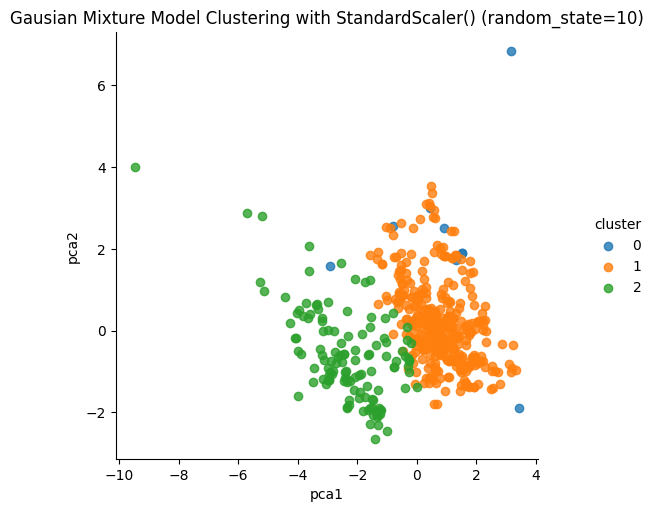

GaussianMixture(n_components=3, random_state=100)
(array([0, 1, 2]), array([ 15,   9, 493]))


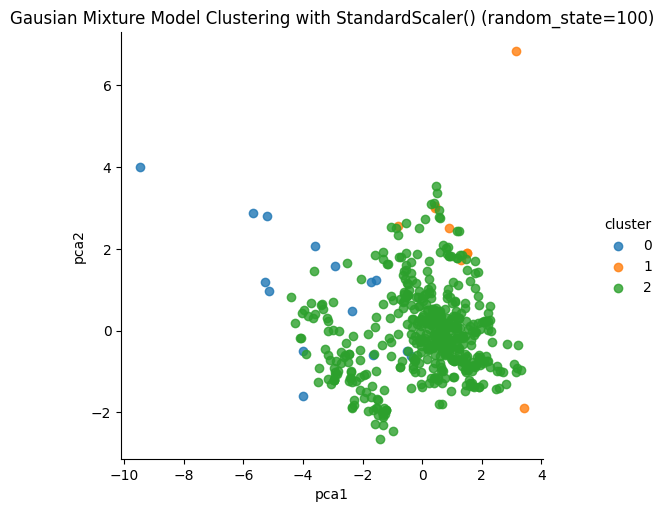

GaussianMixture(n_components=3, random_state=1000)
(array([0, 1, 2]), array([  9, 131, 377]))


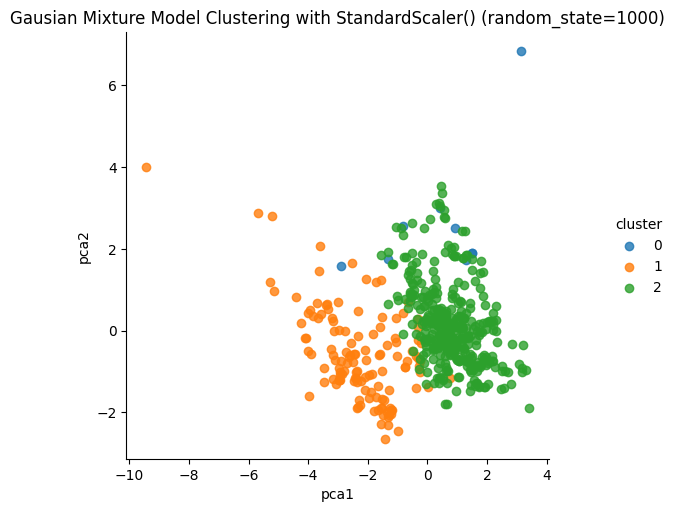

MinMaxScaler()
GaussianMixture(n_components=3, random_state=0)
(array([0, 1, 2]), array([114, 388,  15]))


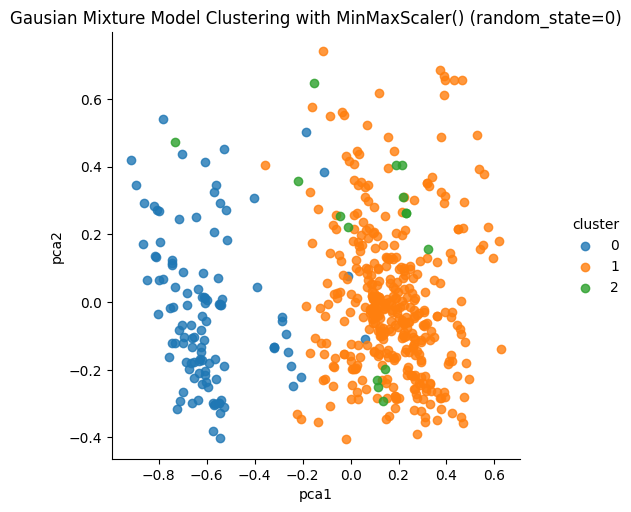

GaussianMixture(n_components=3, random_state=10)
(array([0, 1, 2]), array([393, 109,  15]))


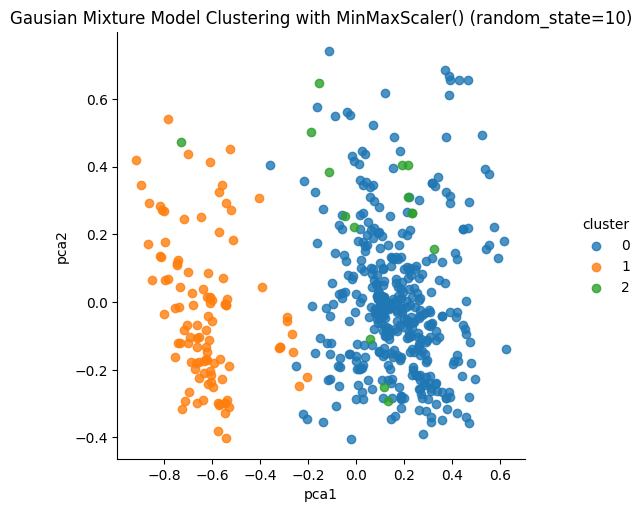

GaussianMixture(n_components=3, random_state=100)
(array([0, 1, 2]), array([110,  14, 393]))


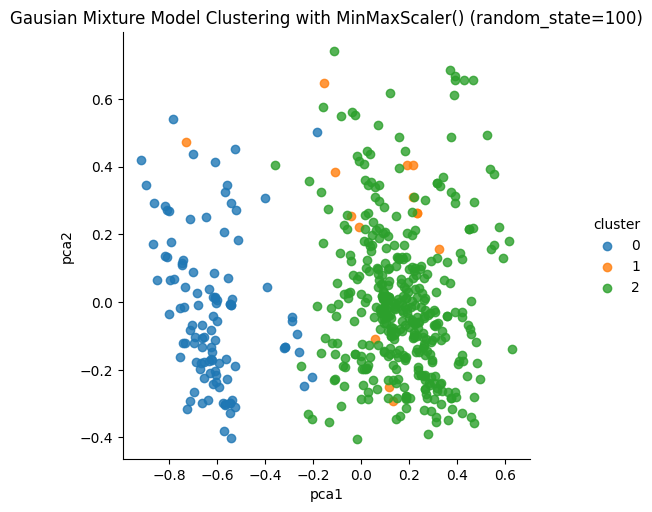

GaussianMixture(n_components=3, random_state=1000)
(array([0, 1, 2]), array([ 15, 388, 114]))


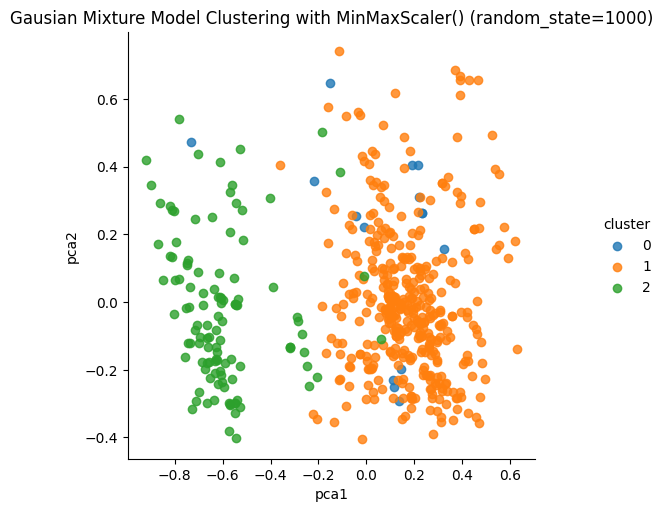

Normalizer()
GaussianMixture(n_components=3, random_state=0)
(array([0, 1, 2]), array([ 39, 429,  49]))


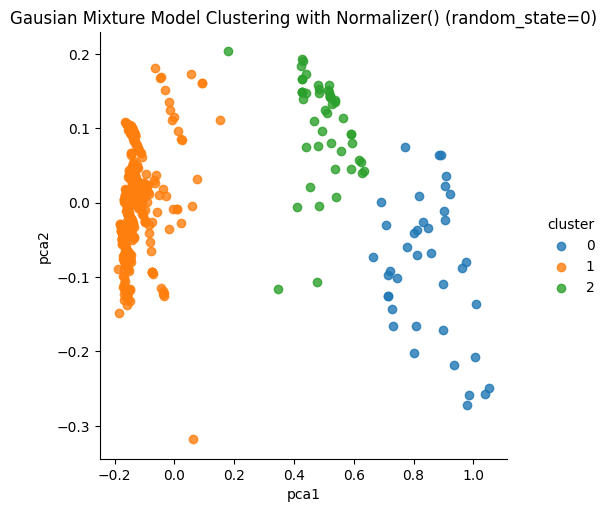

GaussianMixture(n_components=3, random_state=10)
(array([0, 1, 2]), array([429,  39,  49]))


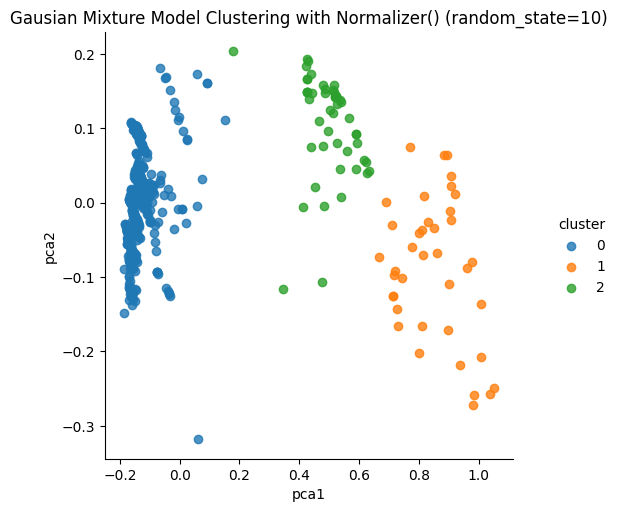

GaussianMixture(n_components=3, random_state=100)
(array([0, 1, 2]), array([ 32,  87, 398]))


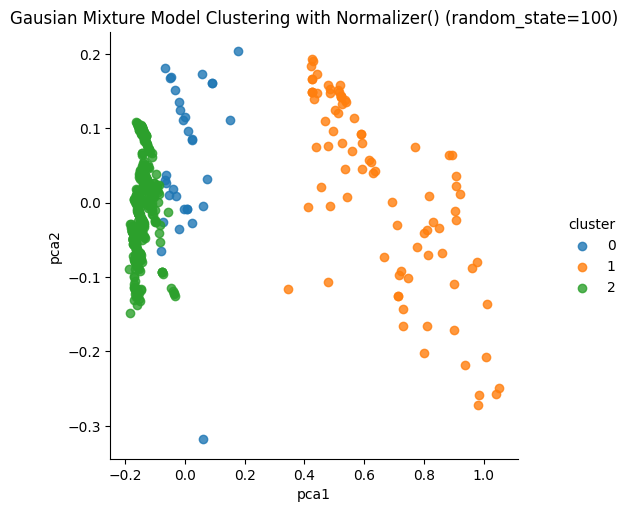

GaussianMixture(n_components=3, random_state=1000)
(array([0, 1, 2]), array([429,  49,  39]))


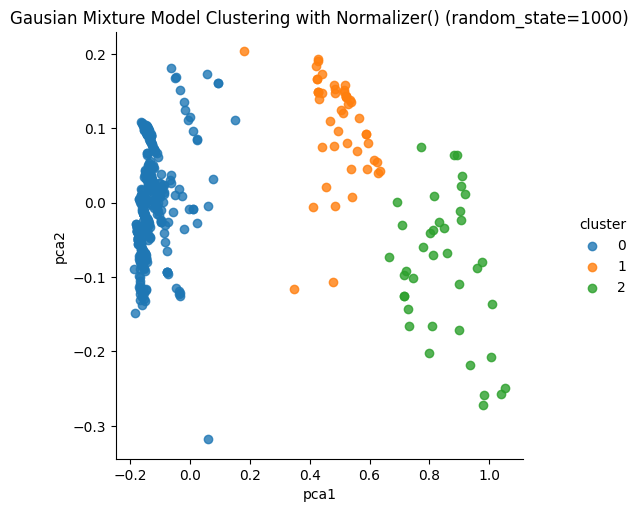

In [25]:
# Scale the features using MinMaxScaler
for scaler in scalers.values():
    print(scaler)
    for r in randomStates:
        scaled_data = scaler.fit_transform(df)

        gmm = GaussianMixture(n_components = 3, random_state=r).fit(scaled_data) 
        print(gmm)
        print(np.unique(gmm.predict(scaled_data), return_counts=True))

        # Create a DataFrame for cluster labels
        cluster_df = pd.DataFrame(gmm.predict(scaled_data), columns=['cluster'])

        # Perform PCA
        pca = PCA(n_components=2).fit(scaled_data)
        pca_trans = pca.transform(scaled_data)
        pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

        # Concatenate cluster labels and PCA components
        result_df = pd.concat([cluster_df, pca_trans_df], axis=1)

        # Plot the results using sns.lmplot
        fig = sns.lmplot(x='pca1', y='pca2', data=result_df, hue='cluster', fit_reg=False)
        plt.title(f'Gausian Mixture Model Clustering with {scaler} (random_state={r})')
        plt.show()